# Goal

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

## Steps you need to take:

    1)Read the column description and ensure you understand each attribute well
    2)Study the data distribution in each attribute, share your findings (15 marks)
    3)Get the target column distribution. Your comments (5 marks)
    4)Split the data into training and test set in the ratio Of 70: 30 respectively (5 marks)
    5)use different classification models (Logistic, K-NN and Naive Bayes) to predict
        the likelihood of a customer buying personal loans (15 marks)
    6)Print the confusion matrix for all the above models (S marks)
    7)Give your reasoning on which is the best model in this case and why it performs
        better? (S marks)

## Learning objectives:

    Exploratory Data Analysis
    Preparing the data to train a model
    Training and making predictions using a classification model
    Model evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.shape

(5000, 14)

In [11]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [22]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [26]:
x = df.drop('Online',axis=1)
y= df['Online']

In [28]:
x.shape

(5000, 13)

In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    1
4997    0
4998    1
4999    1
Name: Online, Length: 5000, dtype: int64

### splitting the data

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

# using Logistic regeression

In [31]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression()
mod.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = mod.predict(x_test)

In [34]:
print('train score : ', mod.score(x_train,y_train))
print('test score : ', mod.score(x_test,y_test))            # under fitting

train score :  0.5911428571428572
test score :  0.61


<AxesSubplot:>

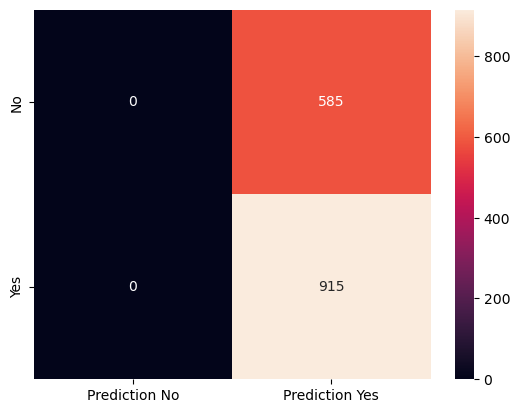

In [62]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_pred,labels=[0,1])

dd = pd.DataFrame(cm,index=[i for i in['No','Yes']],columns=[i for i in ['Prediction No','Prediction Yes']])

sns.heatmap(dd,annot=True,fmt='g')

there is chance of 915 people likely to buy a loan from this model prediction

# using K-NN 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
mod1 = KNeighborsClassifier()
mod1.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
print('train score : ', mod1.score(x_train,y_train))
print('test score : ', mod1.score(x_test,y_test))                # slightly overfitting

train score :  0.7014285714285714
test score :  0.556


C:\Users\TURBO2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\TURBO2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\TURBO2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

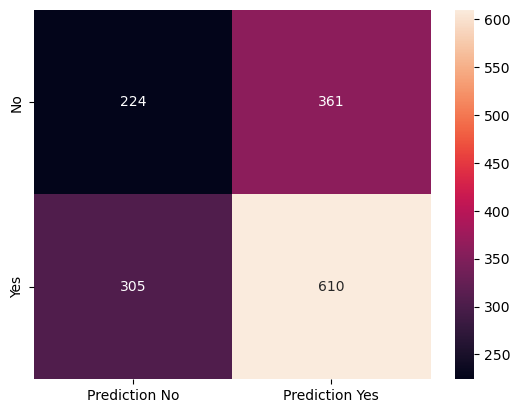

In [52]:
yp = mod1.predict(x_test)
cc = metrics.confusion_matrix(y_test,yp,labels=[0,1])

d1 = pd.DataFrame(cc,index=[i for i in['No','Yes']],columns=[i for i in ['Prediction No','Prediction Yes']])

sns.heatmap(d1,annot=True,fmt='g')

Likely 610 people will buy a loan from KNN model

# using Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

m = GaussianNB()
m.fit(x_train,y_train)

GaussianNB()

In [58]:
print('train score : ', m.score(x_train,y_train))
print('test score : ', m.score(x_test,y_test))            # under fitting

train score :  0.46485714285714286
test score :  0.436


<AxesSubplot:>

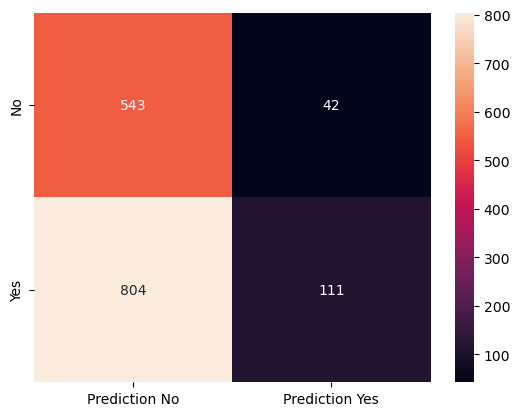

In [59]:
ypp = m.predict(x_test)
cn = metrics.confusion_matrix(y_test,ypp,labels=[0,1])

d2 = pd.DataFrame(cn,index=[i for i in['No','Yes']],columns=[i for i in ['Prediction No','Prediction Yes']])

sns.heatmap(d2,annot=True,fmt='g')

we are getting worst results from Naive Bayes model

# Conclusion

      in my opinion using Logistic Regression is best model for this banking loan problem, 
    because we are getting like 915 people buying the loan